# Dataset Used: Heart Failure Prediction Dataset

### Source: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data

# Description of the dataset

The data contains 918 observations with 12 attributes.

Attribute Information
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

# Objectives

### • To build a machine learning classification model that predicts the presence of heart diseases in individuals.
### • To assist healthcare professionals in identifying patients at high risk of cardiovascular events.


# Solutions as below

# 1. Import libraries and dataset

In [588]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly as py
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report
import warnings

warnings.filterwarnings('ignore')

In [589]:
data = pd.read_csv('/home/izzat/Documents/Project-ML/data/heart.csv')

In [590]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [591]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [592]:
# To identify the features that is categorical data types.
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [593]:
# This will show how many data and columns in the dataframe.
data.shape

(918, 12)

In [594]:
# To checking whether the dataset is balanced or not.
data.HeartDisease.value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [595]:
# To check whether is there any empty data
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# 2. Data Analysis

### Using Seaborn

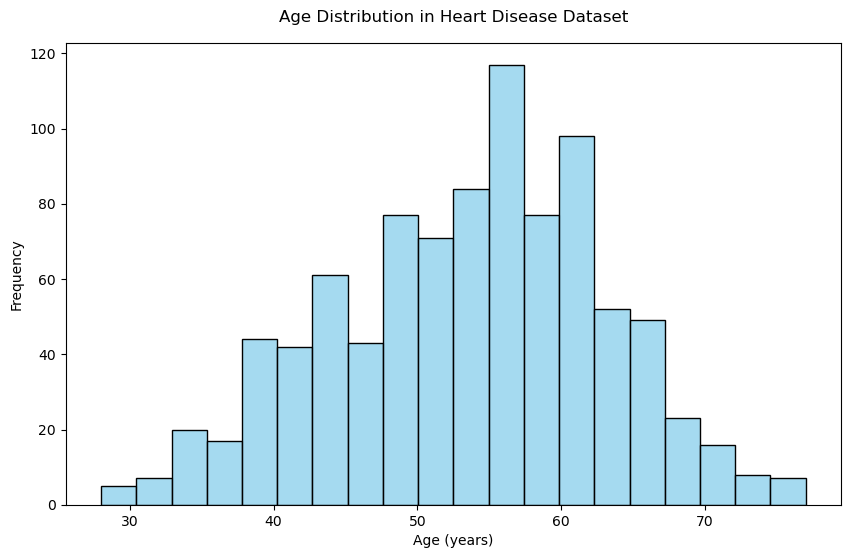

In [596]:
# Create figure
plt.figure(figsize=(10, 6))

# Create histogram
sns.histplot(data=data, 
            x='Age', 
            bins=20,
            color='skyblue',
            edgecolor='black')

# Customize
plt.title('Age Distribution in Heart Disease Dataset', pad=15)
plt.xlabel('Age (years)')
plt.ylabel('Frequency')

# Show plot
plt.show()


### The figure above shows the age distribution in the heart disease dataset

### Using Plotly Express

In [597]:
import plotly.express as px

# Create histogram
fig = px.histogram(data, 
                  x='Age',
                  nbins=20,
                  title='Age Distribution in Heart Disease Dataset',
                  labels={'Age': 'Age (years)',
                         'count': 'Frequency'},
                  color_discrete_sequence=['skyblue'])

# Update layout
fig.update_layout(
    showlegend=False,
    plot_bgcolor='white',
    title_x=0.5
)

# Show plot
fig.show()

### Show the relationship of Chest Pain Type and Heart Disease

In [598]:
fig = px.histogram(data, x='ChestPainType', color='HeartDisease', title='Chest Pain Type vs Heart Disease', barmode='group',color_discrete_sequence=['skyblue', 'lightcoral'])
fig.update_layout(xaxis_title='Chest Pain Type', yaxis_title='Count')
fig.show() 

### The figure above shows the people who have ASY more likely to have heart diseases.
**ATA (Atypical Angina):** Chest pain that doesn't fit the typical pattern of angina. It might not be related to physical exertion and can vary in intensity and location.

**NAP (Non-Anginal Pain):** Chest pain that is not related to heart problems. It could be due to other causes like muscle strain, acid reflux, or anxiety.

**TA (Typical Angina):** Chest pain that occurs due to reduced blood flow to the heart. It usually happens during physical activity or stress and is relieved by rest or medication.

**ASY (Asymptomatic):** No chest pain or symptoms. This term is used when a person does not experience any chest pain despite having conditions that might typically cause it.


In [599]:
fig = px.histogram(data, x='ExerciseAngina', color='HeartDisease', title='Exercise Angina vs Heart Disease', barmode='group',color_discrete_sequence=['skyblue', 'lightcoral'])
fig.update_layout(xaxis_title='Exercise Angina', yaxis_title='Count')
fig.show() 

### As can be seen on the figure above, the person who do have exercise angina because of doing exercise, it more likely to have heart disease.
**Exercise Angina** is chest pain or discomfort that occurs during physical activity or exercise. It happens when the heart muscle doesn't get enough oxygen-rich blood.

### Show the relationship of Resting Blood Pressure and Heart Disease

In [600]:
fig = px.scatter(data, x='RestingBP', y='Cholesterol', color='HeartDisease', title='Resting Blood Pressure vs Cholesterol',
                 color_continuous_scale=['lightcoral', 'blue'])
fig.update_layout(xaxis_title='Resting Blood Pressure', yaxis_title='Cholesterol')
fig.show() 

### The scatter plot above shows the relationship between **Resting Blood Pressure (x-axis) and Cholesterol (y-axis)**, with colors indicating Heart Disease presence. Blue means heart disease, and pink means no heart disease. Most points cluster in the middle ranges of both metrics, with no clear separation between those with and without heart disease. Some outliers, especially in cholesterol levels, are also visible.

**Resting Blood Pressure** is how hard your blood pushes against your blood vessels when your heart is resting between beats. It's like measuring how strong a water hose is when the water is flowing gently.

In [601]:
fig = px.box(data, x='HeartDisease', y='MaxHR', title='Max Heart Rate vs Heart Disease')
fig.update_layout(xaxis_title='Heart Disease', yaxis_title='Max Heart Rate')
fig.show()

### This box plot shows the relationship between Max Heart Rate and Heart Disease.

### Max Heart Rate is the highest number of times your heart can beat per minute. 

**Heart Disease = 0 (No Heart Disease):** The max heart rate is generally higher, with most values between 130 and 170. A few outliers are lower than 100.

**Heart Disease = 1 (Heart Disease):** The max heart rate tends to be lower, mostly between 120 and before 150, with some outliers below 110 and a outlier near to 200.

It suggests that people with heart disease often have lower max heart rates compared to those without heart disease.

In [602]:
fig = px.histogram(data, x='ST_Slope', color='HeartDisease', title='ST Slope vs Heart Disease', barmode='group',color_discrete_sequence=['skyblue', 'lightcoral'])
fig.update_layout(xaxis_title='ST Slope', yaxis_title='Count')
fig.show() 

### The figure above shows people with a **Flat ST Slope** on an ECG may have a higher risk of heart disease. This flat line can indicate that the heart isn't getting enough blood during stress or exercise, which can be a sign of underlying heart problems.

### **ST Slope** refers to the shape of a line on a heart test called an ECG. It shows how the heart's electrical activity changes after each beat.

- **Up**: The line goes up, which usually means the heart is getting enough blood.
- **Flat**: The line is flat, which can be normal or sometimes indicate a problem.
- **Down**: The line goes down, which often suggests the heart isn't getting enough blood.

In [603]:
fig = px.histogram(data,
                   x='FastingBS',
                   color='HeartDisease',
                   title='Fasting Blood Sugar vs Heart Disease',
                   barmode='group',
                   color_discrete_sequence=['skyblue', 'lightcoral'])
fig.update_layout(xaxis_title='Fasting Blood Sugar', yaxis_title='Count')
fig.show() 

### **Fasting Blood Sugar (FastingBS) and Heart Disease**

In this dataset, Fasting Blood Sugar (FastingBS) is categorized as:
- **1**: Fasting blood sugar is greater than 120 mg/dl (high).
- **0**: Fasting blood sugar is 120 mg/dl or less (normal).


In [604]:
color_palette = ['skyblue', 'red']
fig = px.scatter_matrix(
    data,
    dimensions=['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'],
    color='HeartDisease',
    title='Pairplot of Numerical Features',
    color_continuous_scale=color_palette
)
fig.update_layout(
    margin=dict(l=50, r=50, b=50, t=50),
    width=800,
    height=800
)
fig.show()

### This pairplot shows the relationships between the numerical features in the dataset, with the following key points:

Each scatter plot represents the relationship between two numerical features (e.g., Age vs. MaxHR). The diagonal contains histograms showing the distribution of individual features.

The colors indicate the presence of heart disease:
**Red (1):** Indicates heart disease.
**Blue (0):** Indicates no heart disease.

The plot helps visualize trends, clusters, or separations in the data.

For example:
People with **higher MaxHR (Max Heart Rate)** seem less likely to have heart disease.
There is no strong correlation between **RestingBP (Resting Blood Pressure)** and **Cholesterol**.


# 3. Data Preprocessing

### Encoding the categorical data to numerical

In [605]:
# Encode the data from categorical to numerical data
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

le = LabelEncoder()

for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

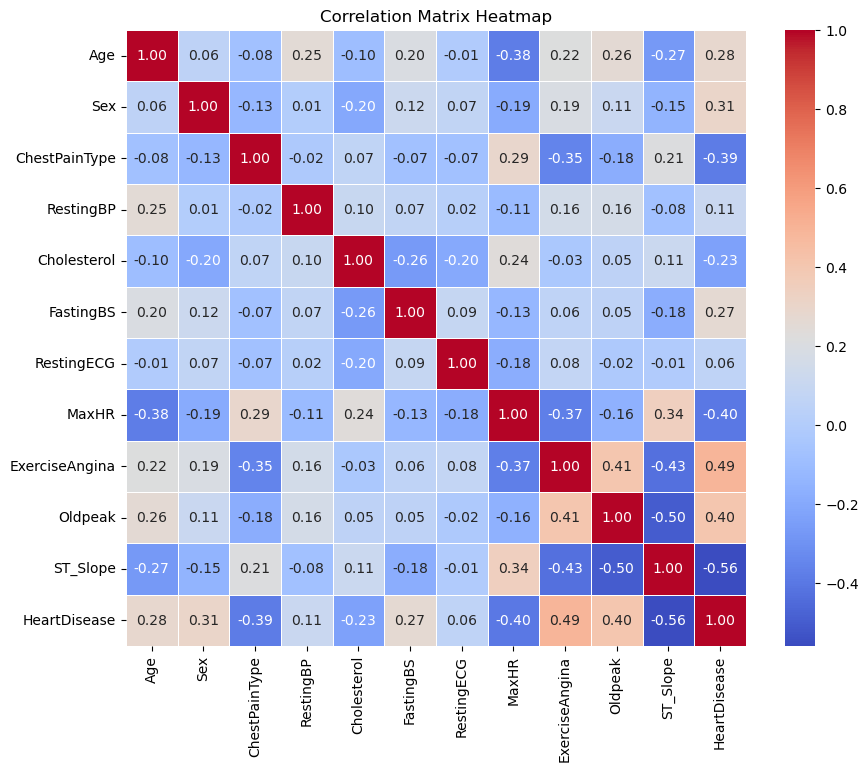

In [606]:
# Checking the correlation using heatmap
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

### After changing the categorical data into numerical,

**Sex**: 
0 = Male, 
1 = Female

**ChestPainType**:
0 = ASY,
1 = ATA,
2 = NAP,
3 = TA

**RestingECG**:
0 = LVH,
1 = Normal,
2 = ST

**ExerciseAngina**:
0 = No(N),
1 = Yes(Y)

**ST_Slope**:
0 = Down,
1 = Flat,
2 = Up

In [607]:
# Check whether it already changed into the numerical data
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [608]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1
917,38,1,2,138,175,0,1,173,0,0.0,2,0


In [609]:
data.ChestPainType.value_counts()

ChestPainType
0    496
2    203
1    173
3     46
Name: count, dtype: int64

### Define the predictor and target attribute

In [610]:
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

In [611]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [612]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

# 4. Split data into train and test set

In [613]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.30, random_state = 42)

In [614]:
X_train.shape

(642, 11)

In [615]:
y_train.shape

(642,)

### Data Scaling

In [616]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_scale_train = scaler.transform(X_train)
X_scale_test = scaler.transform(X_test)

# 5. Train and Evaluate model

### KNN

In [617]:
knn = KNeighborsClassifier(n_neighbors=9)

In [618]:
knn = knn.fit(X_scale_train, y_train)

In [619]:
y_predict = knn.predict(X_scale_test)

In [620]:
y_predict

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [621]:
from sklearn.metrics import accuracy_score
#y_test is actual y value in the testing set. y_pred is the predicted y value
accuracy_score(y_test, y_predict)

0.8623188405797102

In [622]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       112
           1       0.89      0.87      0.88       164

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276



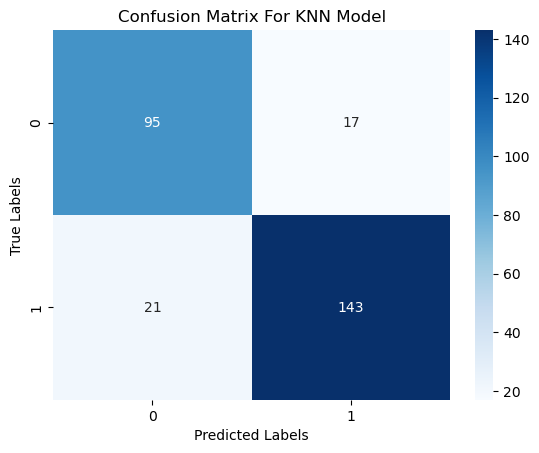

In [623]:
cm_knn = confusion_matrix(y_test, y_predict)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1' ])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For KNN Model')
plt.show()

### Logistic Regression

In [624]:
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_scale_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [625]:
y_predict = logreg.predict(X_scale_test)

In [626]:
from sklearn.metrics import accuracy_score
#y_test is actual y value in the testing set. y_pred is the predicted y value
accuracy_score(y_test, y_predict)

0.8695652173913043

In [627]:
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       112
           1       0.93      0.85      0.89       164

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.87       276
weighted avg       0.88      0.87      0.87       276



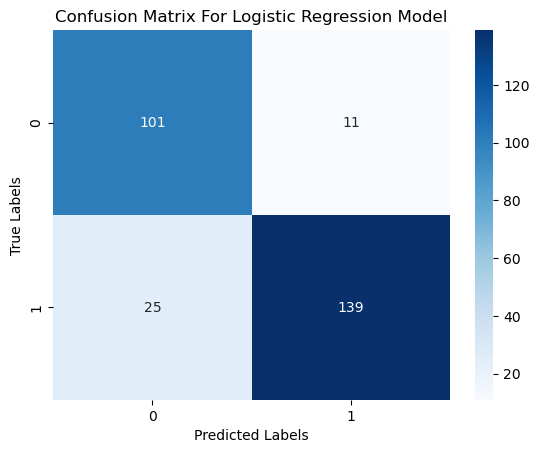

In [628]:
cm_logreg = confusion_matrix(y_test, y_predict)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1' ])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For Logistic Regression Model')
plt.show()

### Decision Tree

In [629]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_scale_train, y_train)

In [630]:
# To return total number of nodes in the decision tree and return the maximum depth of the tree.
dt.tree_.node_count, dt.tree_.max_depth

(189, 15)

In [631]:
y_pred = dt.predict(X_scale_test)

In [632]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.68      0.83      0.75       112
           1       0.86      0.73      0.79       164

    accuracy                           0.77       276
   macro avg       0.77      0.78      0.77       276
weighted avg       0.79      0.77      0.77       276



In [633]:
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=42)
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
scores.mean()

0.7482893799002138

### Decision Tree (With hyperparameter tuning)

In [634]:
from sklearn.model_selection import GridSearchCV
#GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It's essentially a cross-validation technique.

param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_scale_train, y_train)

In [635]:
GR.best_estimator_

DecisionTreeClassifier(max_depth=3, max_features=10, random_state=42)

In [636]:
GR.best_estimator_.tree_.node_count

15

In [637]:
y_best_pred=GR.predict(X_scale_test)

In [638]:
report = classification_report(y_test, y_best_pred)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       112
           1       0.89      0.82      0.85       164

    accuracy                           0.83       276
   macro avg       0.83      0.84      0.83       276
weighted avg       0.84      0.83      0.83       276



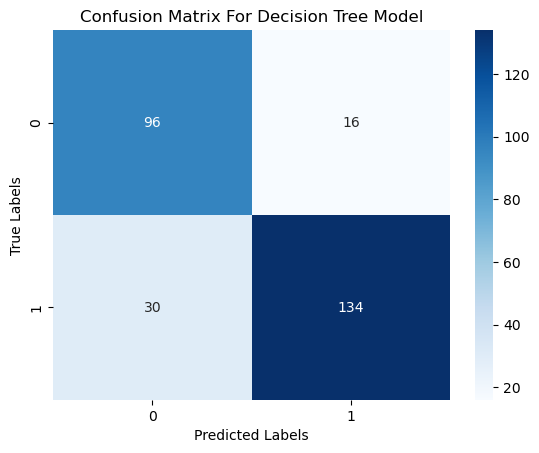

In [639]:
cm_dt = confusion_matrix(y_test, y_best_pred)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1' ])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For Decision Tree Model')
plt.show()

### Random Forest

In [640]:
from sklearn.ensemble import RandomForestClassifier
#is a model that makes predictions based on a number of different models. By combining individual models, the ensemble model tends to be more flexible (less bias) and less data-sensitive (less variance).

forest=RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)

In [641]:
forest.fit(X_scale_train, y_train)

RandomForestClassifier(n_estimators=25, n_jobs=2, random_state=1)

In [642]:
y_test_rf=forest.predict(X_scale_test)

In [643]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_test_rf)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       112
           1       0.92      0.88      0.90       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



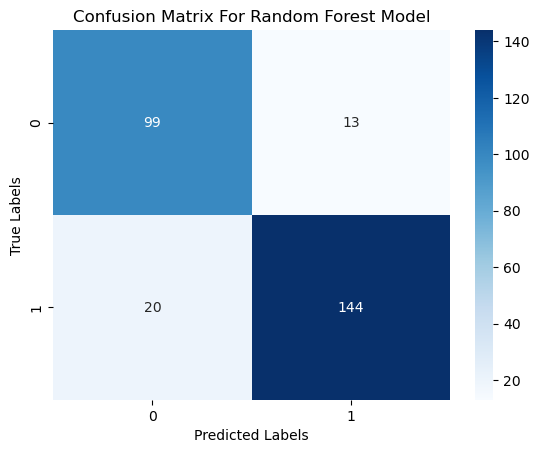

In [644]:
cm_rf = confusion_matrix(y_test, y_test_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1' ])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For Random Forest Model')
plt.show()

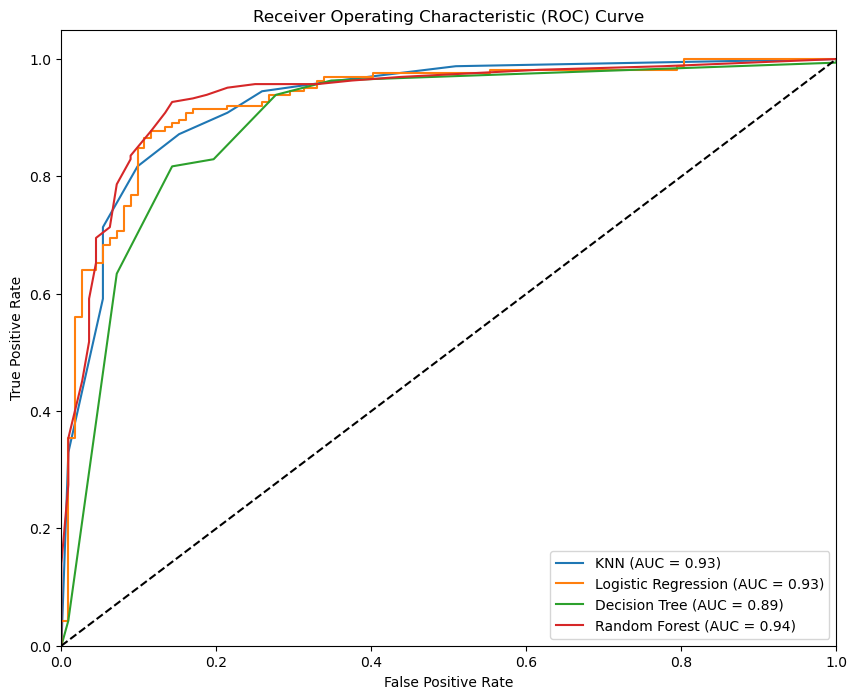

In [645]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Train models
knn = KNeighborsClassifier(n_neighbors=9)
logreg = LogisticRegression(random_state=42, max_iter=1000)
forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)

knn.fit(X_scale_train, y_train)
logreg.fit(X_scale_train, y_train)
forest.fit(X_scale_train, y_train)

# Use the best estimator for Decision Tree
dt_best = GR.best_estimator_
dt_best.fit(X_scale_train, y_train)

# Get predicted probabilities
y_pred_prob_knn = knn.predict_proba(X_scale_test)[:, 1]
y_pred_prob_logreg = logreg.predict_proba(X_scale_test)[:, 1]
y_pred_prob_dt = dt_best.predict_proba(X_scale_test)[:, 1]
y_pred_prob_forest = forest.predict_proba(X_scale_test)[:, 1]

# Compute ROC curve and ROC area for each model
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_prob_logreg)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)
fpr_forest, tpr_forest, _ = roc_curve(y_test, y_pred_prob_forest)

roc_auc_knn = roc_auc_score(y_test, y_pred_prob_knn)
roc_auc_logreg = roc_auc_score(y_test, y_pred_prob_logreg)
roc_auc_dt = roc_auc_score(y_test, y_pred_prob_dt)
roc_auc_forest = roc_auc_score(y_test, y_pred_prob_forest)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_forest, tpr_forest, label=f'Random Forest (AUC = {roc_auc_forest:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 6. Train and Evaluate Model (Split and Test Using StratifiedShuffleSplit)

In [646]:
from sklearn.model_selection import StratifiedShuffleSplit
#Using StratifiedShuffleSplit the proportion of distribution of class labels is almost even between train and test dataset

# Split the data into two parts with 1000 points in the test data
# This creates a generator
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Get the index values from the generator
train_idx, test_idx = next(strat_shuff_split.split(X, y))

# Create the data sets
X_train = data.loc[train_idx, X.columns]
y_train = data.loc[train_idx, 'HeartDisease']

X_test = data.loc[test_idx, X.columns]
y_test = data.loc[test_idx, 'HeartDisease']

In [647]:
#Now check the percent composition of each quality level in the train and test data sets. 
y_train.value_counts(normalize=True).sort_index()

HeartDisease
0    0.44704
1    0.55296
Name: proportion, dtype: float64

In [648]:
y_test.value_counts(normalize=True).sort_index()

HeartDisease
0    0.445652
1    0.554348
Name: proportion, dtype: float64

### Decision Tree

In [649]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

In [650]:
dt.tree_.node_count, dt.tree_.max_depth

(197, 13)

In [651]:
y_pred=dt.predict(X_test)

In [652]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       123
           1       0.86      0.84      0.85       153

    accuracy                           0.84       276
   macro avg       0.83      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



### Decision Tree (With HyperParameter Tuning)

In [653]:
from sklearn.model_selection import GridSearchCV
#GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It's essentially a cross-validation technique.

param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)

In [654]:
GR.best_estimator_

DecisionTreeClassifier(max_depth=3, max_features=8, random_state=42)

In [655]:
GR.best_estimator_.tree_.node_count

15

In [656]:
y_best_pred=GR.predict(X_test)

In [657]:
report = classification_report(y_test, y_best_pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       123
           1       0.87      0.82      0.84       153

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276



### Random Forest

In [658]:
from sklearn.ensemble import RandomForestClassifier
#is a model that makes predictions based on a number of different models. By combining individual models, the ensemble model tends to be more flexible (less bias) and less data-sensitive (less variance).

forest=RandomForestClassifier(criterion='gini', n_estimators=100, random_state=1, n_jobs=2)

In [659]:
forest.fit(X_train, y_train)

RandomForestClassifier(n_jobs=2, random_state=1)

In [660]:
y_test_rf=forest.predict(X_test)

In [661]:
from sklearn.metrics import confusion_matrix
report = classification_report(y_test, y_test_rf)
print (confusion_matrix(y_test,y_test_rf))
print(report)

[[109  14]
 [ 14 139]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       123
           1       0.91      0.91      0.91       153

    accuracy                           0.90       276
   macro avg       0.90      0.90      0.90       276
weighted avg       0.90      0.90      0.90       276



### Logistic Regression

In [662]:
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [663]:
y_predict = logreg.predict(X_test)

In [664]:
from sklearn.metrics import accuracy_score
#y_test is actual y value in the testing set. y_pred is the predicted y value
accuracy_score(y_test, y_predict)

0.8586956521739131

In [665]:
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       123
           1       0.87      0.88      0.87       153

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276



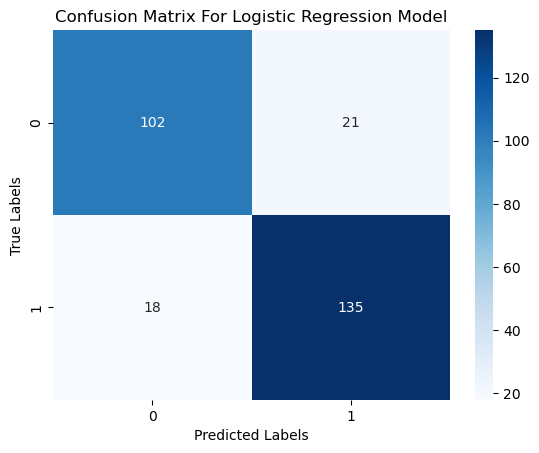

In [666]:
cm_logreg = confusion_matrix(y_test, y_predict)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1' ])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For Logistic Regression Model')
plt.show()

### KNN

In [667]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_scale_train = scaler.transform(X_train)
X_scale_test = scaler.transform(X_test)

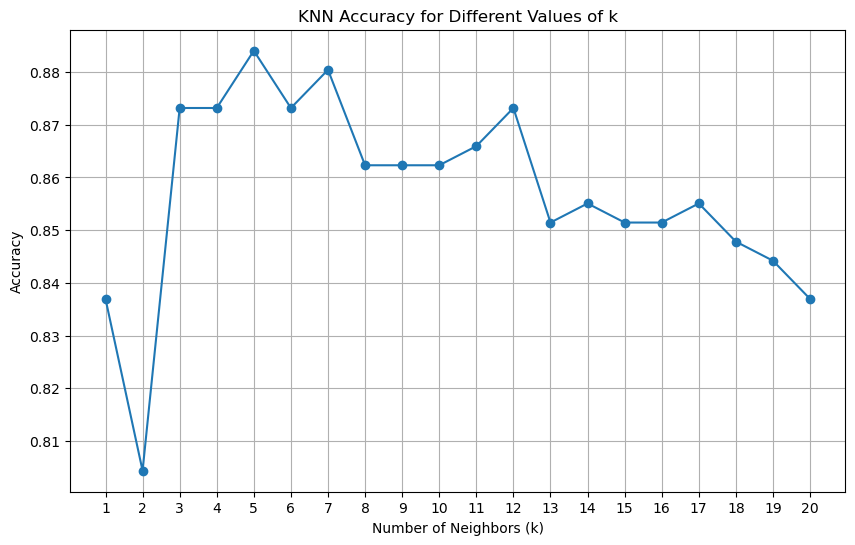

In [668]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Fit K-nearest neighbors model and store accuracy scores
score_list = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_scale_train, y_train)
    y_pred = knn.predict(X_scale_test)
    score = accuracy_score(y_test, y_pred)
    score_list.append((k, score))

# Create DataFrame
score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])

# Plot accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(score_df['k'], score_df['accuracy'], marker='o', linestyle='-')
plt.xticks(range(1, 21))  # Set x-ticks to be whole numbers from 1 to 20
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different Values of k')
plt.grid(True)
plt.show()

In [669]:
knn = KNeighborsClassifier(n_neighbors=5)

In [670]:
knn = knn.fit(X_scale_train, y_train)

In [671]:
y_predict = knn.predict(X_scale_test)

In [672]:
y_predict

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1])

In [673]:
from sklearn.metrics import accuracy_score
#y_test is actual y value in the testing set. y_pred is the predicted y value
accuracy_score(y_test, y_predict)

0.8840579710144928

In [674]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       123
           1       0.88      0.92      0.90       153

    accuracy                           0.88       276
   macro avg       0.89      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



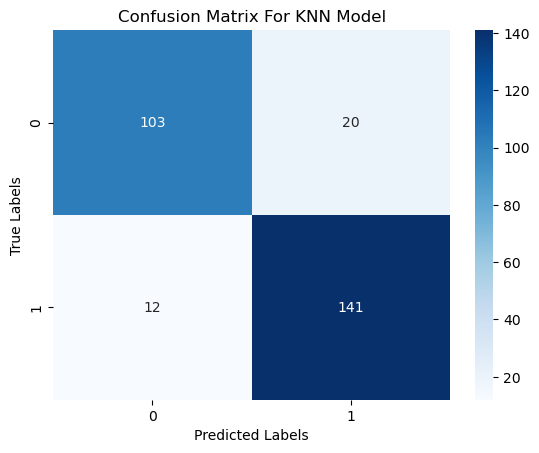

In [675]:
cm_knn = confusion_matrix(y_test, y_predict)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1' ])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For KNN Model')
plt.show()

# 7. Train and Evaluate Model (Using top 5 features)

## Check correlation of features with the target variable 'HeartDisease'

In [676]:
# Check correlation of features with the target variable 'HeartDisease'
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
correlation_with_heartdisease = correlation_matrix['HeartDisease'].sort_values(ascending=False)
print(correlation_with_heartdisease)

HeartDisease      1.000000
ExerciseAngina    0.494282
Oldpeak           0.403951
Sex               0.305445
Age               0.282039
FastingBS         0.267291
RestingBP         0.107589
RestingECG        0.057384
Cholesterol      -0.232741
ChestPainType    -0.386828
MaxHR            -0.400421
ST_Slope         -0.558771
Name: HeartDisease, dtype: float64


## As can be seen on correlation above, we will select the top 5 features with highest correlation

1. ST_Slope (-0.56)
2. ExerciseAngina (0.49)
3. Oldpeak (0.40)
4. MaxHR (-0.40)
5. ChestPainType (-0.39)

In [677]:
selected_features = ['ST_Slope', 'ExerciseAngina', 'Oldpeak', 'MaxHR', 'ChestPainType']
print(selected_features)

['ST_Slope', 'ExerciseAngina', 'Oldpeak', 'MaxHR', 'ChestPainType']


## Define the predictor and target attribute

In [678]:
X = data[selected_features]

In [679]:
y = data['HeartDisease']

In [680]:
X

,ST_Slope,ExerciseAngina,Oldpeak,MaxHR,ChestPainType
0,2,0,0.0,172,1
1,1,0,1.0,156,2
2,2,0,0.0,98,1
3,1,1,1.5,108,0
4,2,0,0.0,122,2
...,...,...,...,...,...
913,1,0,1.2,132,3
914,1,0,3.4,141,0
915,1,1,1.2,115,0
916,1,0,0.0,174,1


In [681]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

## Split data into train and test set (70:30) ratio

In [682]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.30, random_state = 42)

In [683]:
X_train.shape

(642, 5)

In [684]:
X_train

,ST_Slope,ExerciseAngina,Oldpeak,MaxHR,ChestPainType
712,2,0,0.1,156,0
477,0,1,2.0,108,0
409,1,1,0.0,122,2
448,1,1,1.0,105,0
838,2,1,1.8,132,0
...,...,...,...,...,...
106,2,0,0.0,110,0
270,2,0,0.0,140,0
860,2,1,1.4,144,0
435,2,1,0.0,118,0


In [685]:
y_train.shape

(642,)

In [686]:
y_train

712    1
477    1
409    1
448    1
838    1
      ..
106    0
270    0
860    1
435    0
102    1
Name: HeartDisease, Length: 642, dtype: int64

### Data Scaling

In [687]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_scale_train = scaler.transform(X_train)
X_scale_test = scaler.transform(X_test)

### Train and Evaluate model using top 5 features

### KNN

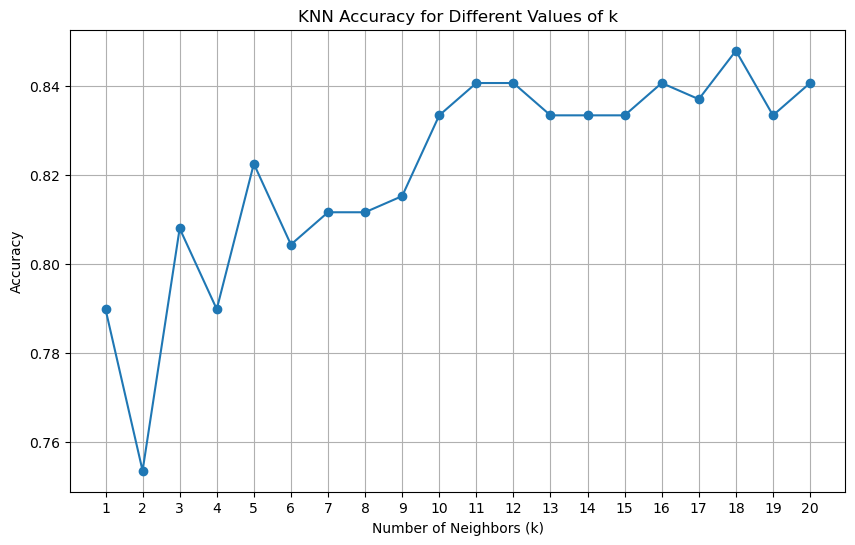

In [688]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Fit K-nearest neighbors model and store accuracy scores
score_list = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_scale_train, y_train)
    y_pred = knn.predict(X_scale_test)
    score = accuracy_score(y_test, y_pred)
    score_list.append((k, score))

# Create DataFrame
score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])

# Plot accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(score_df['k'], score_df['accuracy'], marker='o', linestyle='-')
plt.xticks(range(1, 21))  # Set x-ticks to be whole numbers from 1 to 20
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different Values of k')
plt.grid(True)
plt.show()

In [689]:
knn = KNeighborsClassifier(n_neighbors=18)

In [690]:
knn = knn.fit(X_scale_train, y_train)

In [691]:
y_predict = knn.predict(X_scale_test)

In [692]:
y_predict

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [693]:
from sklearn.metrics import accuracy_score
#y_test is actual y value in the testing set. y_pred is the predicted y value
accuracy_score(y_test, y_predict)

0.8478260869565217

In [694]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       112
           1       0.91      0.82      0.87       164

    accuracy                           0.85       276
   macro avg       0.84      0.85      0.85       276
weighted avg       0.86      0.85      0.85       276



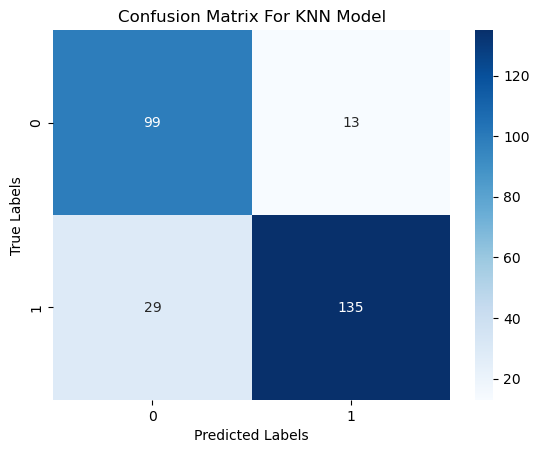

In [695]:
cm_knn = confusion_matrix(y_test, y_predict)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1' ])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For KNN Model')
plt.show()

### Logistic Regression

In [696]:
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_scale_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [697]:
y_predict = logreg.predict(X_scale_test)

In [698]:
from sklearn.metrics import accuracy_score
#y_test is actual y value in the testing set. y_pred is the predicted y value
accuracy_score(y_test, y_predict)

0.8297101449275363

In [699]:
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       112
           1       0.90      0.80      0.85       164

    accuracy                           0.83       276
   macro avg       0.83      0.84      0.83       276
weighted avg       0.84      0.83      0.83       276



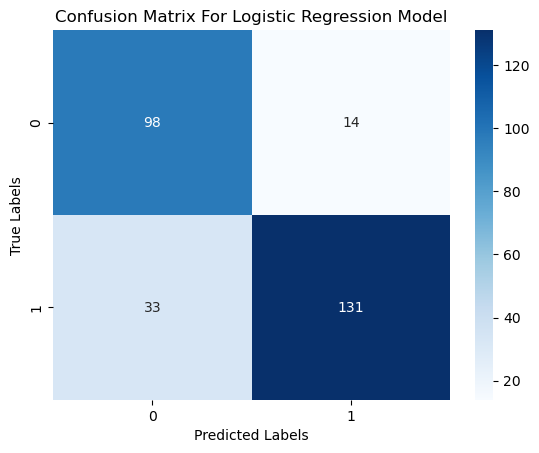

In [700]:
cm_logreg = confusion_matrix(y_test, y_predict)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1' ])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For Logistic Regression Model')
plt.show()

### Decision Tree

In [701]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_scale_train, y_train)

In [702]:
# To return total number of nodes in the decision tree and return the maximum depth of the tree.
dt.tree_.node_count, dt.tree_.max_depth

(283, 16)

In [703]:
y_pred = dt.predict(X_scale_test)

In [704]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.66      0.80      0.72       112
           1       0.84      0.71      0.77       164

    accuracy                           0.75       276
   macro avg       0.75      0.76      0.75       276
weighted avg       0.77      0.75      0.75       276



In [705]:
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=42)
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
scores.mean()

0.77227963886909

### Decision Tree (With hyperparameter tuning)

In [706]:
from sklearn.model_selection import GridSearchCV
#GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It's essentially a cross-validation technique.

param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_scale_train, y_train)

In [707]:
GR.best_estimator_

DecisionTreeClassifier(max_depth=3, max_features=4, random_state=42)

In [708]:
GR.best_estimator_.tree_.node_count

15

In [709]:
y_best_pred=GR.predict(X_scale_test)

In [710]:
report = classification_report(y_test, y_best_pred)
print(report)

              precision    recall  f1-score   support

           0       0.69      0.92      0.79       112
           1       0.93      0.71      0.81       164

    accuracy                           0.80       276
   macro avg       0.81      0.82      0.80       276
weighted avg       0.83      0.80      0.80       276



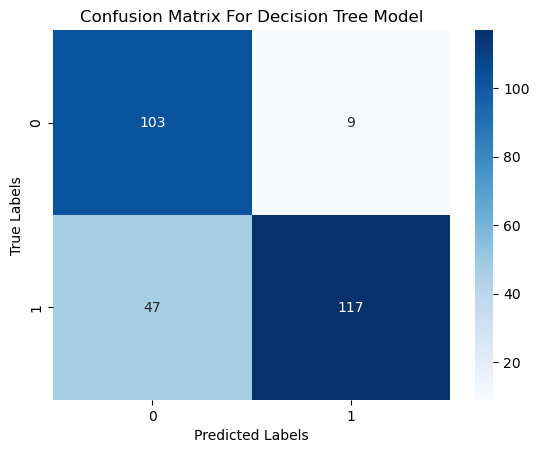

In [711]:
cm_dt = confusion_matrix(y_test, y_best_pred)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1' ])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For Decision Tree Model')
plt.show()

### Random Forest

In [712]:
from sklearn.ensemble import RandomForestClassifier
#is a model that makes predictions based on a number of different models. By combining individual models, the ensemble model tends to be more flexible (less bias) and less data-sensitive (less variance).

forest=RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)

In [713]:
forest.fit(X_scale_train, y_train)

RandomForestClassifier(n_estimators=25, n_jobs=2, random_state=1)

In [714]:
y_test_rf=forest.predict(X_scale_test)

In [715]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_test_rf)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.86      0.78       112
           1       0.89      0.76      0.82       164

    accuracy                           0.80       276
   macro avg       0.80      0.81      0.80       276
weighted avg       0.82      0.80      0.80       276



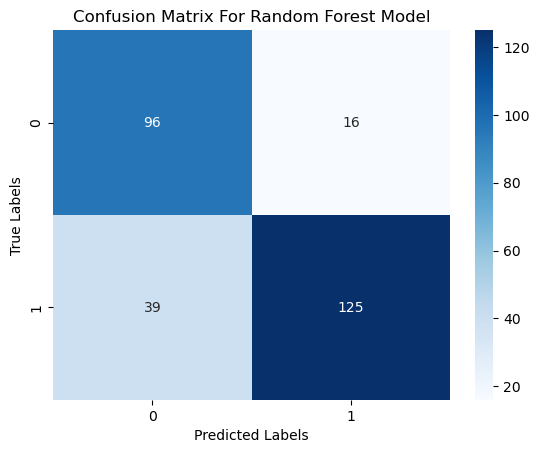

In [716]:
cm_rf = confusion_matrix(y_test, y_test_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1' ])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For Random Forest Model')
plt.show()

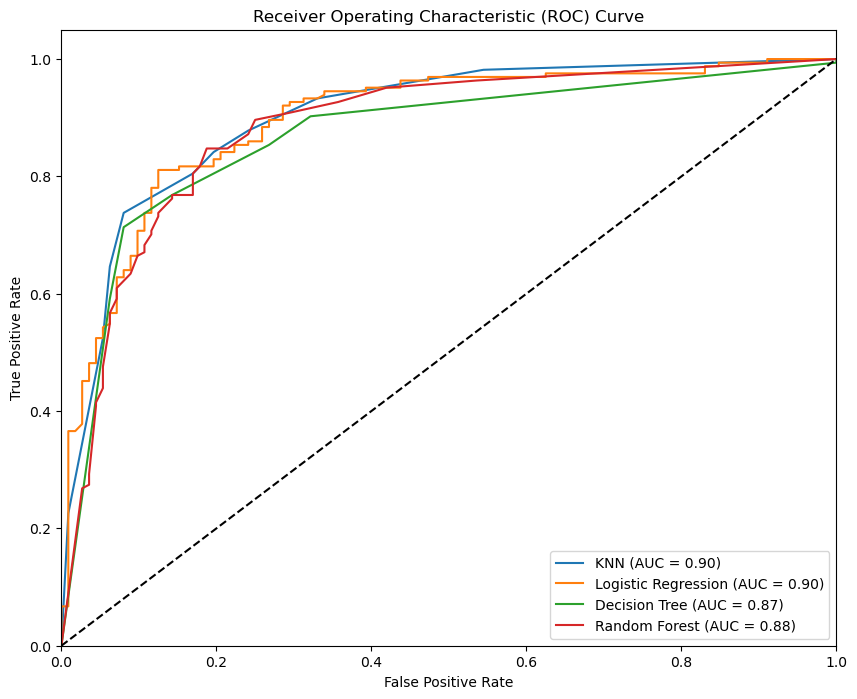

In [717]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Train models
knn = KNeighborsClassifier(n_neighbors=9)
logreg = LogisticRegression(random_state=42, max_iter=1000)
forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)

knn.fit(X_scale_train, y_train)
logreg.fit(X_scale_train, y_train)
forest.fit(X_scale_train, y_train)

# Use the best estimator for Decision Tree
dt_best = GR.best_estimator_
dt_best.fit(X_scale_train, y_train)

# Get predicted probabilities
y_pred_prob_knn = knn.predict_proba(X_scale_test)[:, 1]
y_pred_prob_logreg = logreg.predict_proba(X_scale_test)[:, 1]
y_pred_prob_dt = dt_best.predict_proba(X_scale_test)[:, 1]
y_pred_prob_forest = forest.predict_proba(X_scale_test)[:, 1]

# Compute ROC curve and ROC area for each model
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_prob_logreg)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)
fpr_forest, tpr_forest, _ = roc_curve(y_test, y_pred_prob_forest)

roc_auc_knn = roc_auc_score(y_test, y_pred_prob_knn)
roc_auc_logreg = roc_auc_score(y_test, y_pred_prob_logreg)
roc_auc_dt = roc_auc_score(y_test, y_pred_prob_dt)
roc_auc_forest = roc_auc_score(y_test, y_pred_prob_forest)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_forest, tpr_forest, label=f'Random Forest (AUC = {roc_auc_forest:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Split data into train and test set (80:20) ratio

In [718]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.20, random_state = 42)

In [719]:
X_train.shape

(734, 5)

In [720]:
X_train

,ST_Slope,ExerciseAngina,Oldpeak,MaxHR,ChestPainType
795,0,0,0.8,194,2
25,2,0,0.0,178,2
84,1,1,1.0,125,0
10,2,0,0.0,142,2
344,1,0,0.0,104,0
...,...,...,...,...,...
106,2,0,0.0,110,0
270,2,0,0.0,140,0
860,2,1,1.4,144,0
435,2,1,0.0,118,0


In [721]:
y_train.shape

(734,)

In [722]:
y_train

795    0
25     0
84     1
10     0
344    1
      ..
106    0
270    0
860    1
435    0
102    1
Name: HeartDisease, Length: 734, dtype: int64

### Data Scaling

In [723]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_scale_train = scaler.transform(X_train)
X_scale_test = scaler.transform(X_test)

### Train and Evaluate model using top 5 features

### KNN

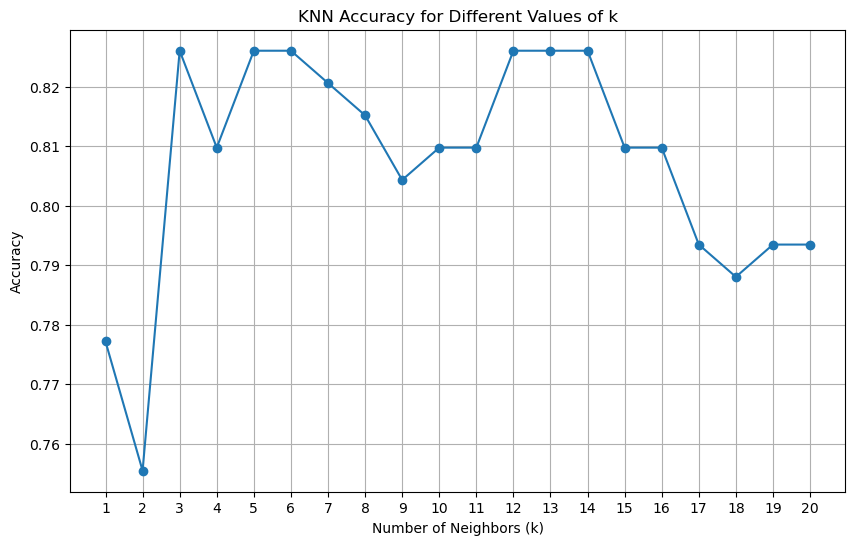

In [724]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Fit K-nearest neighbors model and store accuracy scores
score_list = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_scale_train, y_train)
    y_pred = knn.predict(X_scale_test)
    score = accuracy_score(y_test, y_pred)
    score_list.append((k, score))

# Create DataFrame
score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])

# Plot accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(score_df['k'], score_df['accuracy'], marker='o', linestyle='-')
plt.xticks(range(1, 21))  # Set x-ticks to be whole numbers from 1 to 20
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different Values of k')
plt.grid(True)
plt.show()

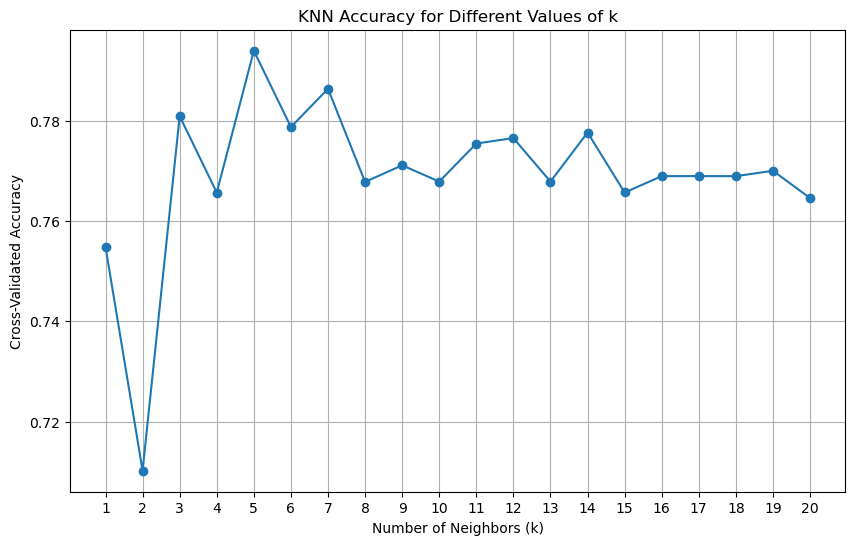

The best k is 5 with an accuracy of 0.794


In [725]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Initialize variables
k_range = range(1, 21)
k_scores = []

# Perform cross-validation for each k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

# Plot accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o', linestyle='-')
plt.xticks(k_range)  # Set x-ticks to be whole numbers from 1 to 20
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Accuracy for Different Values of k')
plt.grid(True)
plt.show()

# Find the best k
best_k = k_range[np.argmax(k_scores)]
print(f"The best k is {best_k} with an accuracy of {max(k_scores):.3f}")

In [726]:
knn = KNeighborsClassifier(n_neighbors=3)

In [727]:
knn = knn.fit(X_scale_train, y_train)

In [728]:
y_predict = knn.predict(X_scale_test)

In [729]:
y_predict

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1])

In [730]:
from sklearn.metrics import accuracy_score
#y_test is actual y value in the testing set. y_pred is the predicted y value
accuracy_score(y_test, y_predict)

0.8260869565217391

In [731]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        77
           1       0.90      0.79      0.84       107

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.82       184
weighted avg       0.84      0.83      0.83       184



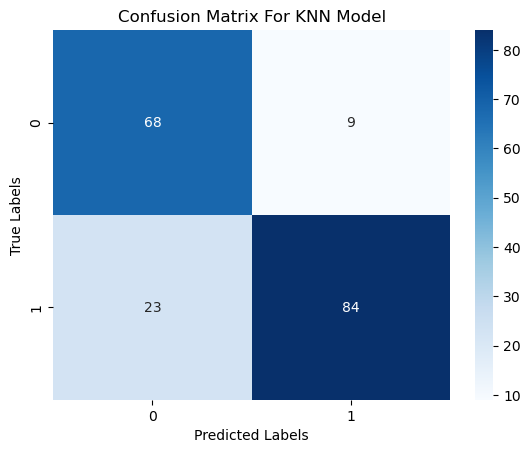

In [732]:
cm_knn = confusion_matrix(y_test, y_predict)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1' ])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For KNN Model')
plt.show()

### Logistic Regression

In [733]:
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_scale_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [734]:
y_predict = logreg.predict(X_scale_test)

In [735]:
from sklearn.metrics import accuracy_score
#y_test is actual y value in the testing set. y_pred is the predicted y value
accuracy_score(y_test, y_predict)

0.8043478260869565

In [736]:
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.86      0.79        77
           1       0.88      0.77      0.82       107

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.82      0.80      0.81       184



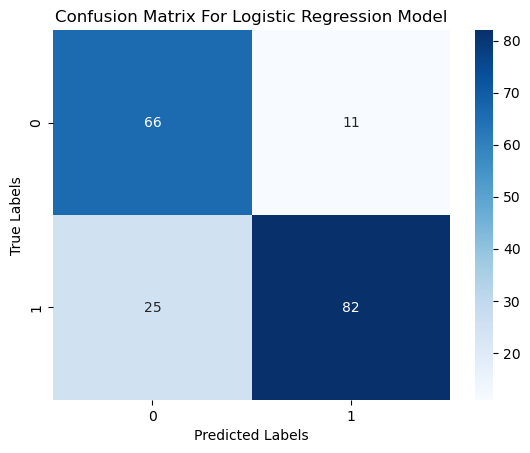

In [737]:
cm_logreg = confusion_matrix(y_test, y_predict)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1' ])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For Logistic Regression Model')
plt.show()

### Decision Tree

In [738]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_scale_train, y_train)

In [739]:
# To return total number of nodes in the decision tree and return the maximum depth of the tree.
dt.tree_.node_count, dt.tree_.max_depth

(319, 16)

In [740]:
y_pred = dt.predict(X_scale_test)

In [741]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.65      0.86      0.74        77
           1       0.87      0.66      0.75       107

    accuracy                           0.74       184
   macro avg       0.76      0.76      0.74       184
weighted avg       0.77      0.74      0.75       184



In [742]:
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=42)
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
scores.mean()

0.77227963886909

### Decision Tree (With hyperparameter tuning)

In [743]:
from sklearn.model_selection import GridSearchCV
#GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It's essentially a cross-validation technique.

param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_scale_train, y_train)

In [744]:
GR.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=3, random_state=42)

In [745]:
GR.best_estimator_.tree_.node_count

53

In [746]:
y_best_pred=GR.predict(X_scale_test)

In [747]:
report = classification_report(y_test, y_best_pred)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.83      0.76        77
           1       0.86      0.74      0.79       107

    accuracy                           0.78       184
   macro avg       0.78      0.78      0.78       184
weighted avg       0.79      0.78      0.78       184



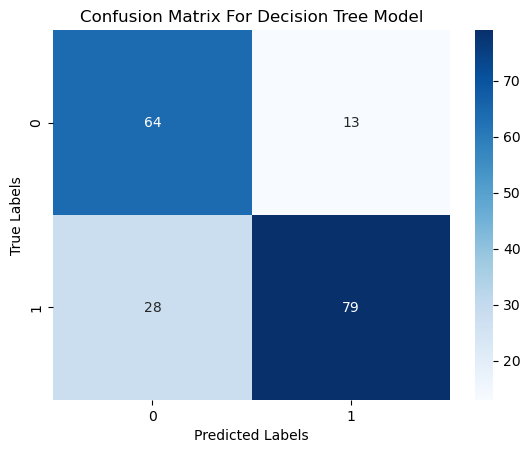

In [748]:
cm_dt = confusion_matrix(y_test, y_best_pred)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1' ])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For Decision Tree Model')
plt.show()

### Random Forest

In [749]:
from sklearn.ensemble import RandomForestClassifier
#is a model that makes predictions based on a number of different models. By combining individual models, the ensemble model tends to be more flexible (less bias) and less data-sensitive (less variance).

forest=RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)

In [750]:
forest.fit(X_scale_train, y_train)

RandomForestClassifier(n_estimators=25, n_jobs=2, random_state=1)

In [751]:
y_test_rf=forest.predict(X_scale_test)

In [752]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_test_rf)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.84      0.76        77
           1       0.87      0.74      0.80       107

    accuracy                           0.78       184
   macro avg       0.78      0.79      0.78       184
weighted avg       0.80      0.78      0.78       184



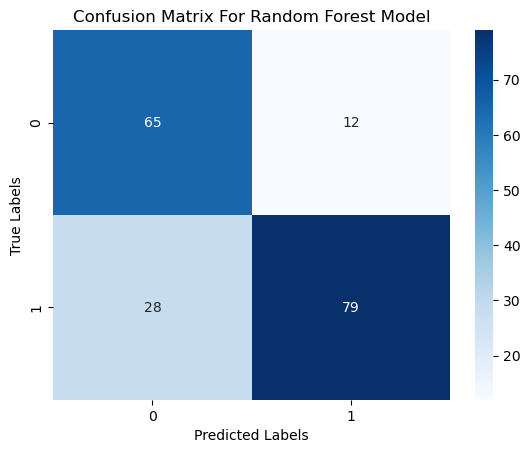

In [753]:
cm_rf = confusion_matrix(y_test, y_test_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1' ])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For Random Forest Model')
plt.show()

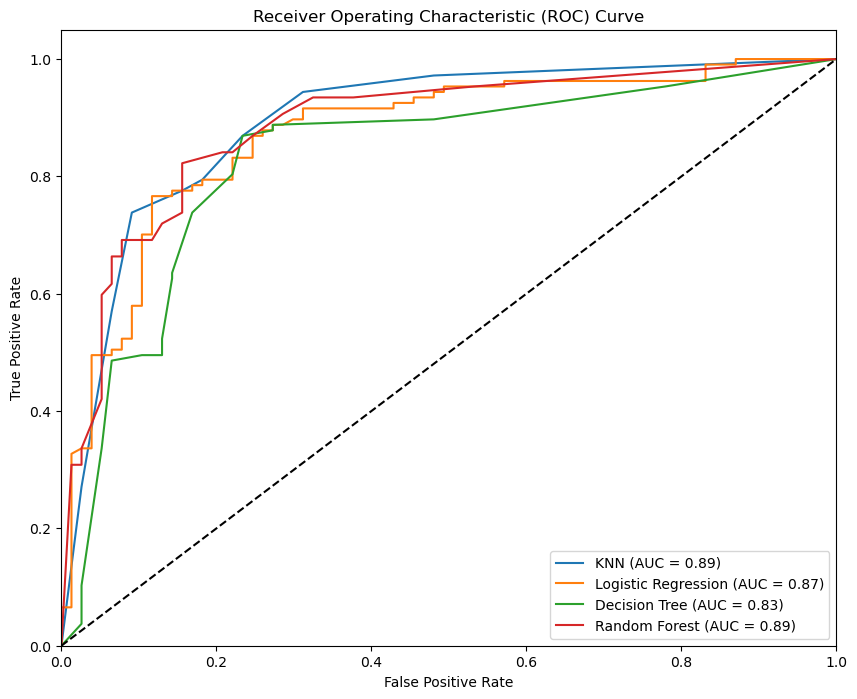

In [754]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Train models
knn = KNeighborsClassifier(n_neighbors=9)
logreg = LogisticRegression(random_state=42, max_iter=1000)
forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)

knn.fit(X_scale_train, y_train)
logreg.fit(X_scale_train, y_train)
forest.fit(X_scale_train, y_train)

# Use the best estimator for Decision Tree
dt_best = GR.best_estimator_
dt_best.fit(X_scale_train, y_train)

# Get predicted probabilities
y_pred_prob_knn = knn.predict_proba(X_scale_test)[:, 1]
y_pred_prob_logreg = logreg.predict_proba(X_scale_test)[:, 1]
y_pred_prob_dt = dt_best.predict_proba(X_scale_test)[:, 1]
y_pred_prob_forest = forest.predict_proba(X_scale_test)[:, 1]

# Compute ROC curve and ROC area for each model
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_prob_logreg)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)
fpr_forest, tpr_forest, _ = roc_curve(y_test, y_pred_prob_forest)

roc_auc_knn = roc_auc_score(y_test, y_pred_prob_knn)
roc_auc_logreg = roc_auc_score(y_test, y_pred_prob_logreg)
roc_auc_dt = roc_auc_score(y_test, y_pred_prob_dt)
roc_auc_forest = roc_auc_score(y_test, y_pred_prob_forest)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_forest, tpr_forest, label=f'Random Forest (AUC = {roc_auc_forest:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Split data into train and test set (90:10) ratio

In [755]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.10, random_state = 42)

In [756]:
X_train.shape

(826, 5)

In [757]:
X_train

,ST_Slope,ExerciseAngina,Oldpeak,MaxHR,ChestPainType
557,1,1,1.8,122,2
260,2,1,0.0,165,1
235,1,1,1.0,160,1
218,2,0,0.0,150,1
382,1,1,2.0,145,0
...,...,...,...,...,...
106,2,0,0.0,110,0
270,2,0,0.0,140,0
860,2,1,1.4,144,0
435,2,1,0.0,118,0


In [758]:
y_train.shape

(826,)

In [759]:
y_train

557    1
260    0
235    0
218    0
382    1
      ..
106    0
270    0
860    1
435    0
102    1
Name: HeartDisease, Length: 826, dtype: int64

### Data Scaling

In [760]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_scale_train = scaler.transform(X_train)
X_scale_test = scaler.transform(X_test)

### Train and Evaluate model using top 5 features

### KNN

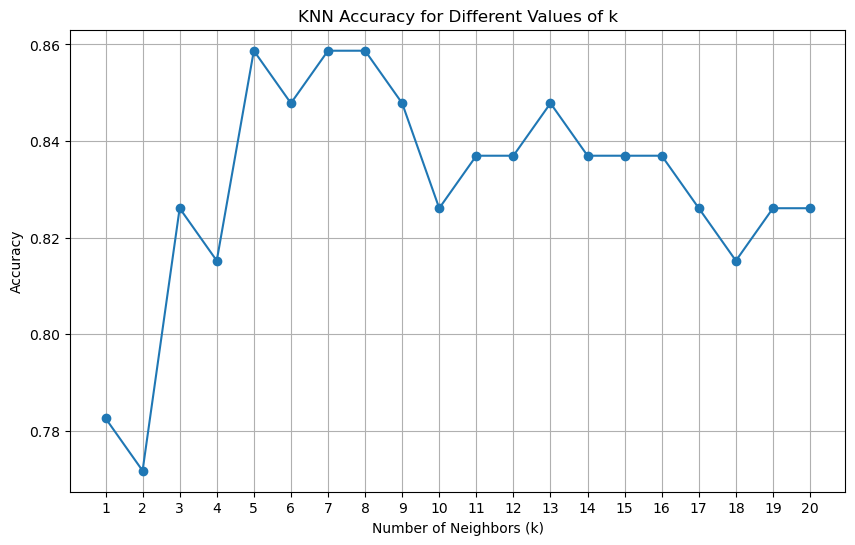

In [761]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Fit K-nearest neighbors model and store accuracy scores
score_list = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_scale_train, y_train)
    y_pred = knn.predict(X_scale_test)
    score = accuracy_score(y_test, y_pred)
    score_list.append((k, score))

# Create DataFrame
score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])

# Plot accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(score_df['k'], score_df['accuracy'], marker='o', linestyle='-')
plt.xticks(range(1, 21))  # Set x-ticks to be whole numbers from 1 to 20
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different Values of k')
plt.grid(True)
plt.show()

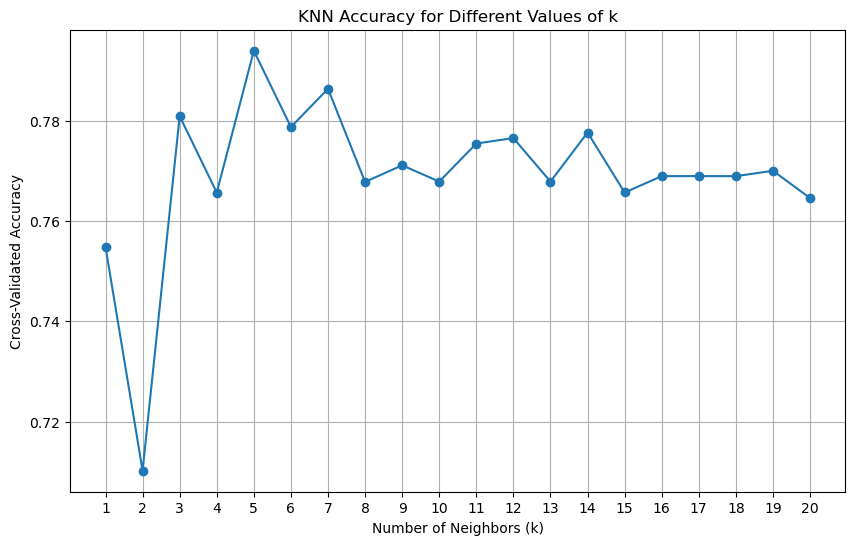

The best k is 5 with an accuracy of 0.794


In [762]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Initialize variables
k_range = range(1, 21)
k_scores = []

# Perform cross-validation for each k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

# Plot accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o', linestyle='-')
plt.xticks(k_range)  # Set x-ticks to be whole numbers from 1 to 20
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Accuracy for Different Values of k')
plt.grid(True)
plt.show()

# Find the best k
best_k = k_range[np.argmax(k_scores)]
print(f"The best k is {best_k} with an accuracy of {max(k_scores):.3f}")

In [763]:
knn = KNeighborsClassifier(n_neighbors=5)

In [764]:
knn = knn.fit(X_scale_train, y_train)

In [765]:
y_predict = knn.predict(X_scale_test)

In [766]:
y_predict

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1])

In [767]:
from sklearn.metrics import accuracy_score
#y_test is actual y value in the testing set. y_pred is the predicted y value
accuracy_score(y_test, y_predict)

0.8586956521739131

In [768]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.87      0.84        38
           1       0.90      0.85      0.88        54

    accuracy                           0.86        92
   macro avg       0.85      0.86      0.86        92
weighted avg       0.86      0.86      0.86        92



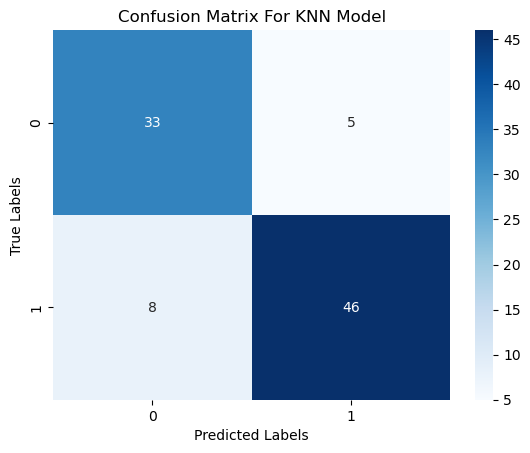

In [769]:
cm_knn = confusion_matrix(y_test, y_predict)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1' ])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For KNN Model')
plt.show()

### Logistic Regression

In [770]:
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_scale_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [771]:
y_predict = logreg.predict(X_scale_test)

In [772]:
from sklearn.metrics import accuracy_score
#y_test is actual y value in the testing set. y_pred is the predicted y value
accuracy_score(y_test, y_predict)

0.8152173913043478

In [773]:
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.84      0.79        38
           1       0.88      0.80      0.83        54

    accuracy                           0.82        92
   macro avg       0.81      0.82      0.81        92
weighted avg       0.82      0.82      0.82        92



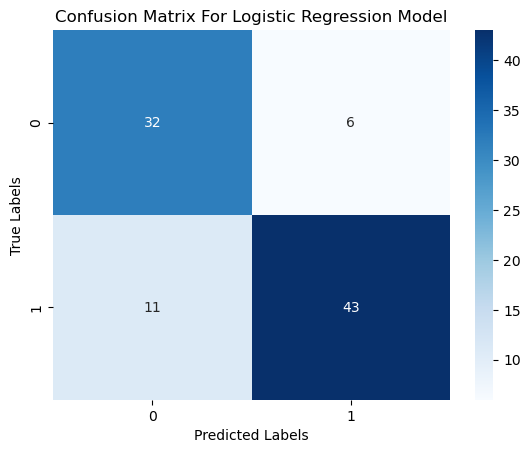

In [774]:
cm_logreg = confusion_matrix(y_test, y_predict)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1' ])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For Logistic Regression Model')
plt.show()

### Decision Tree

In [775]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_scale_train, y_train)

In [776]:
# To return total number of nodes in the decision tree and return the maximum depth of the tree.
dt.tree_.node_count, dt.tree_.max_depth

(375, 19)

In [777]:
y_pred = dt.predict(X_scale_test)

In [778]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.61      0.79      0.69        38
           1       0.81      0.65      0.72        54

    accuracy                           0.71        92
   macro avg       0.71      0.72      0.71        92
weighted avg       0.73      0.71      0.71        92



In [779]:
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=42)
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
scores.mean()

0.77227963886909

### Decision Tree (With hyperparameter tuning)

In [780]:
from sklearn.model_selection import GridSearchCV
#GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It's essentially a cross-validation technique.

param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_scale_train, y_train)

In [781]:
GR.best_estimator_

DecisionTreeClassifier(max_depth=3, max_features=3, random_state=42)

In [782]:
GR.best_estimator_.tree_.node_count

15

In [783]:
y_best_pred=GR.predict(X_scale_test)

In [784]:
report = classification_report(y_test, y_best_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        38
           1       0.84      0.89      0.86        54

    accuracy                           0.84        92
   macro avg       0.84      0.83      0.83        92
weighted avg       0.84      0.84      0.84        92



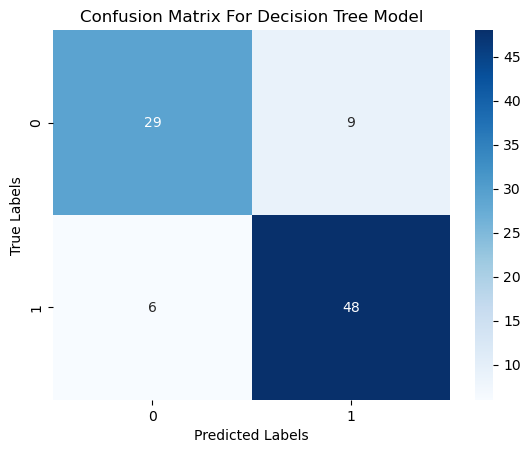

In [785]:
cm_dt = confusion_matrix(y_test, y_best_pred)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1' ])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For Decision Tree Model')
plt.show()

### Random Forest

In [786]:
from sklearn.ensemble import RandomForestClassifier
#is a model that makes predictions based on a number of different models. By combining individual models, the ensemble model tends to be more flexible (less bias) and less data-sensitive (less variance).

forest=RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)

In [787]:
forest.fit(X_scale_train, y_train)

RandomForestClassifier(n_estimators=25, n_jobs=2, random_state=1)

In [788]:
y_test_rf=forest.predict(X_scale_test)

In [789]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_test_rf)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.82      0.78        38
           1       0.86      0.81      0.84        54

    accuracy                           0.82        92
   macro avg       0.81      0.82      0.81        92
weighted avg       0.82      0.82      0.82        92



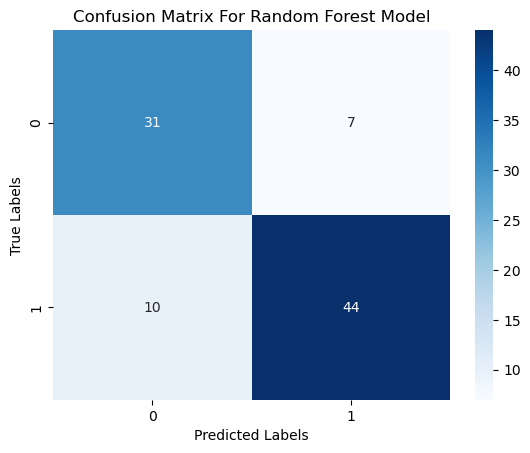

In [790]:
cm_rf = confusion_matrix(y_test, y_test_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1' ])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For Random Forest Model')
plt.show()

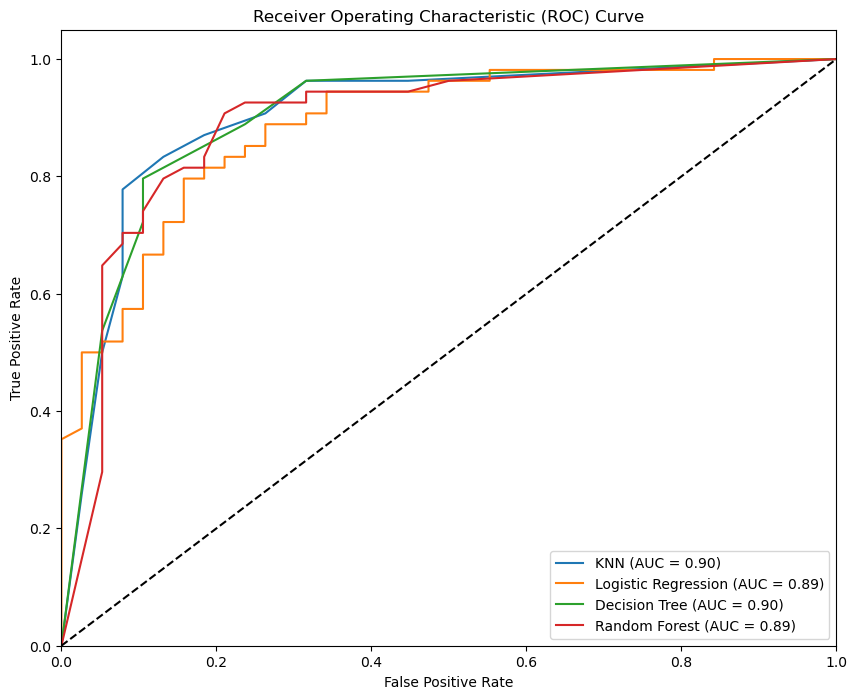

In [791]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Train models
knn = KNeighborsClassifier(n_neighbors=9)
logreg = LogisticRegression(random_state=42, max_iter=1000)
forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)

knn.fit(X_scale_train, y_train)
logreg.fit(X_scale_train, y_train)
forest.fit(X_scale_train, y_train)

# Use the best estimator for Decision Tree
dt_best = GR.best_estimator_
dt_best.fit(X_scale_train, y_train)

# Get predicted probabilities
y_pred_prob_knn = knn.predict_proba(X_scale_test)[:, 1]
y_pred_prob_logreg = logreg.predict_proba(X_scale_test)[:, 1]
y_pred_prob_dt = dt_best.predict_proba(X_scale_test)[:, 1]
y_pred_prob_forest = forest.predict_proba(X_scale_test)[:, 1]

# Compute ROC curve and ROC area for each model
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_prob_logreg)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)
fpr_forest, tpr_forest, _ = roc_curve(y_test, y_pred_prob_forest)

roc_auc_knn = roc_auc_score(y_test, y_pred_prob_knn)
roc_auc_logreg = roc_auc_score(y_test, y_pred_prob_logreg)
roc_auc_dt = roc_auc_score(y_test, y_pred_prob_dt)
roc_auc_forest = roc_auc_score(y_test, y_pred_prob_forest)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_forest, tpr_forest, label=f'Random Forest (AUC = {roc_auc_forest:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 8. Conclusion

Using **StratifiedShuffleSplit (SSS)** yielded significantly better results compared to our initial method. We also experimented with **selecting the top 5 features** and **testing with different ratio splits**, but this approach did not lead to any improvement in the results. In contrast, the application of SSS provided a noticeable enhancement in performance. Specifically, our best model, which is the **Random Forest classifier**, saw its accuracy increase from **88%** to **90%**. This demonstrates that SSS is a more effective technique for our dataset, leading to more reliable and accurate model performance.